## Import Library

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, r2_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pickle

## Data Loading

In [87]:
df = pd.read_csv('Admission_Predict.csv')

In [88]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [89]:
# See the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Rename the columns.

In [90]:
df_copy = df.copy()
df_copy.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [91]:
df_copy = df_copy.rename(columns= {'Chance of Admit ':'Admitted Chance', 'LOR ':'LOR'})

All of the datas are numeric, except for 'University Rating' and 'Research' which are encoded categoric datas.

In [92]:
# Make a dataframe of numerical datas
df_num = df_copy.drop(['Serial No.', 'University Rating', 'Research', 'Admitted Chance'], axis=1)
df_num

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,337,118,4.5,4.5,9.65
1,324,107,4.0,4.5,8.87
2,316,104,3.0,3.5,8.00
3,322,110,3.5,2.5,8.67
4,314,103,2.0,3.0,8.21
...,...,...,...,...,...
395,324,110,3.5,3.5,9.04
396,325,107,3.0,3.5,9.11
397,330,116,5.0,4.5,9.45
398,312,103,3.5,4.0,8.78


Check if there are any missing values in the dataset:

In [93]:
check_nan_in_df = df.isnull().sum()
print (check_nan_in_df)

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


There are no missing values in the dataset.\
See if there are any duplicated rows:

In [94]:
duplicated_row_df = df[df.duplicated()]
duplicated_row_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


There are no duplicated rows.

## EXPLORATORY DATA ANALYSIS (EDA)

Take a look at the data's distribution in each column.

Skewness Value :  GRE Score     -0.062893
TOEFL Score    0.057216
SOP           -0.275761
LOR           -0.106991
CGPA          -0.065991
dtype: float64


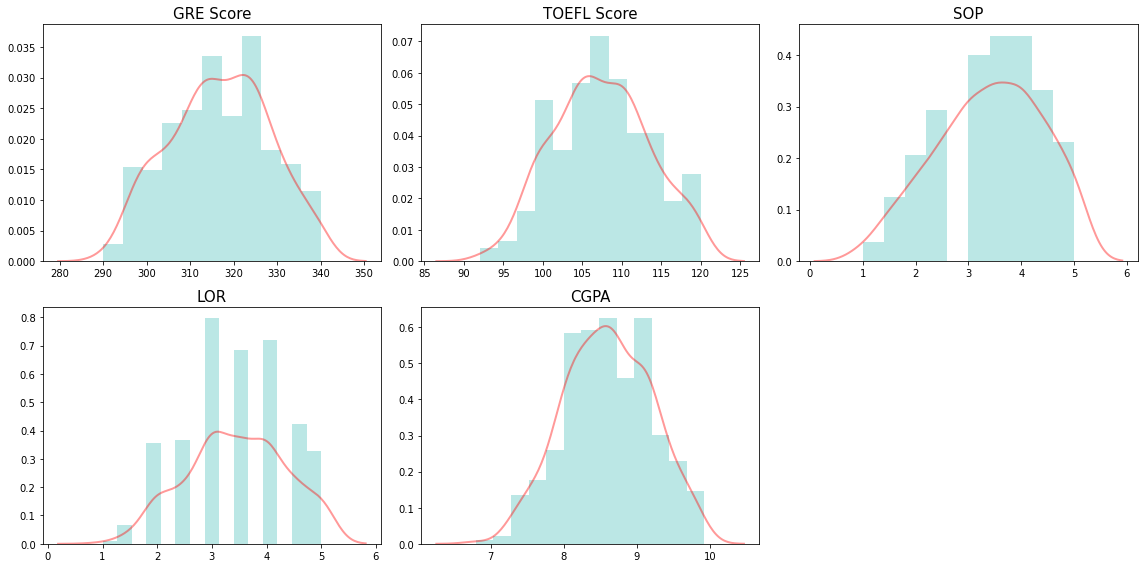

In [95]:
a = 2
b = 3
c = 1
plt.figure(figsize=(16, 8), facecolor='white')
print('Skewness Value : ', df_num[df_num.columns].skew())
for col in df_num.columns:
    plt.subplot(a, b, c)
    sns.distplot(df_num[col], kde_kws={'color':'r', 'lw':2, 'alpha': 0.4},hist_kws={'color':'lightseagreen', 'alpha': 0.3})
    plt.title(f"{col}", size=15)
    plt.xlabel('')
    plt.ylabel('')
    c = c+1
plt.tight_layout()

The numeric data in each columns are normally distributed.

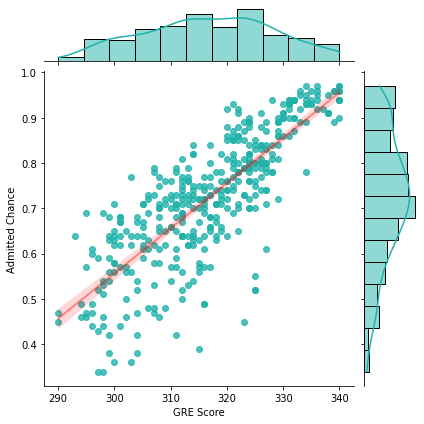

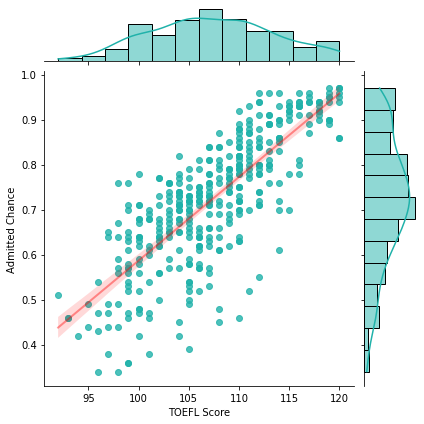

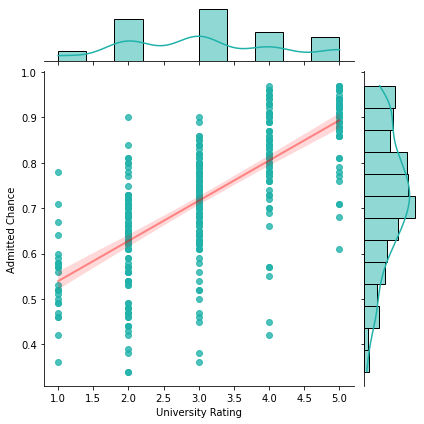

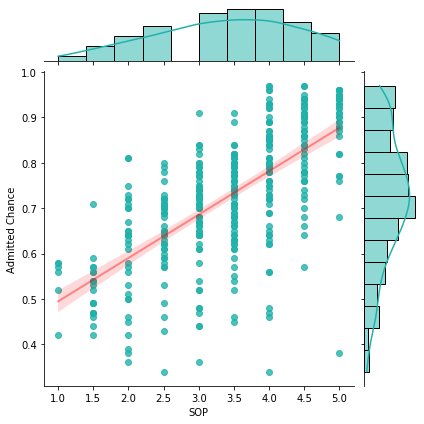

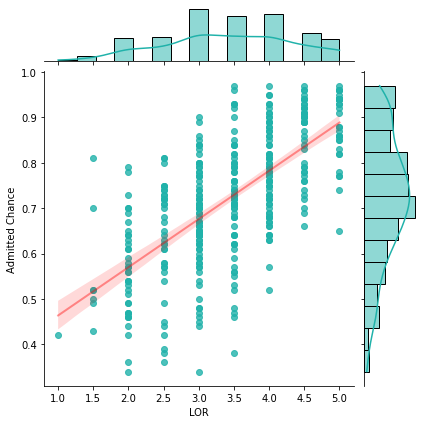

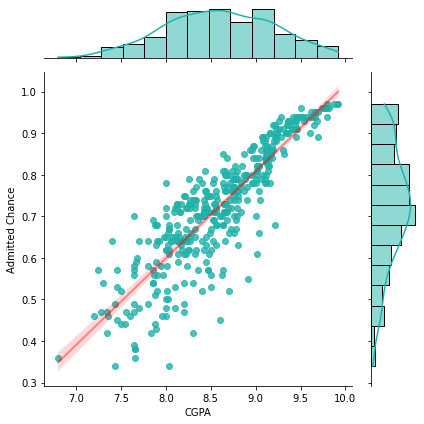

In [96]:
sns.jointplot(x='GRE Score', y='Admitted Chance', data= df_copy, kind='reg', color= 'lightseagreen', line_kws={'color':'r', 'lw':2, 'alpha': 0.4})
sns.jointplot(x='TOEFL Score', y='Admitted Chance', data= df_copy, kind='reg', color= 'lightseagreen', line_kws={'color':'r', 'lw':2, 'alpha': 0.4})
sns.jointplot(x='University Rating', y='Admitted Chance', data= df_copy, kind='reg', color= 'lightseagreen', line_kws={'color':'r', 'lw':2, 'alpha': 0.4})
sns.jointplot(x='SOP', y='Admitted Chance', data= df_copy, kind='reg', color= 'lightseagreen', line_kws={'color':'r', 'lw':2, 'alpha': 0.4})
sns.jointplot(x='LOR', y='Admitted Chance', data= df_copy, kind='reg', color= 'lightseagreen', line_kws={'color':'r', 'lw':2, 'alpha': 0.4})
sns.jointplot(x='CGPA', y='Admitted Chance', data= df_copy, kind='reg', color= 'lightseagreen', line_kws={'color':'r', 'lw':2, 'alpha': 0.4})
#sns.jointplot(x='Research', y='Admitted Chance', data= df_copy, kind='reg', color= 'lightseagreen', line_kws={'color':'r', 'lw':2, 'alpha': 0.4})
plt.tight_layout()

All of the features have a linear relationship with the label; 'Admitted Chance'. As the values of the features (GRE score, TOEFL score, previous university rating, Statement of Purpose strength, Letter of Recommendation Strength, and Undergraduate GPA score) increase, the chane to get admitted will also get higher.

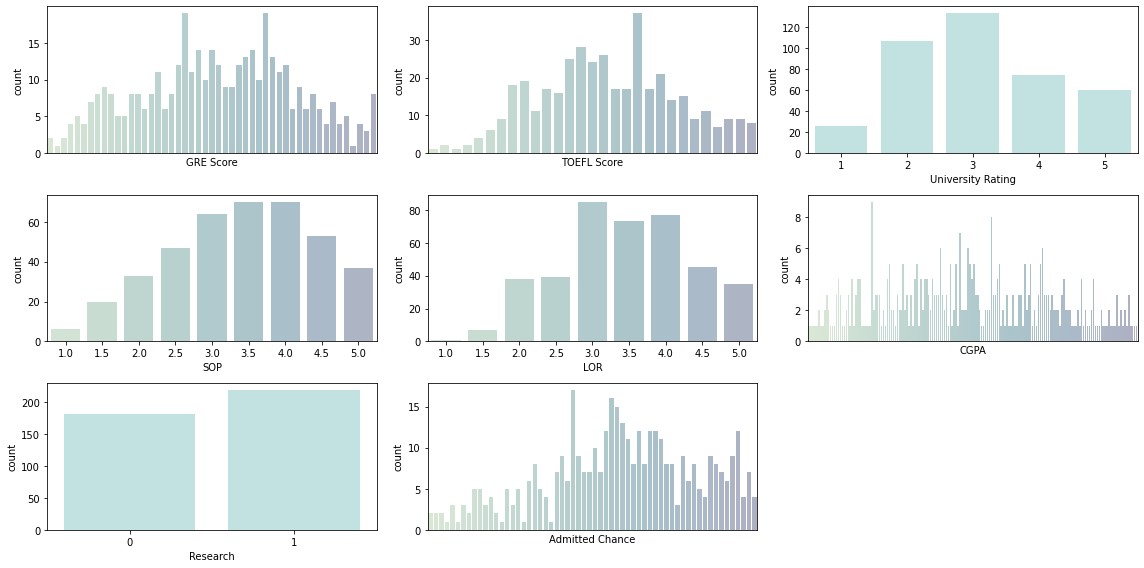

In [97]:
fig = plt.figure(figsize=(16, 8))
plt.subplot(331)
sns.countplot(x='GRE Score', data= df_copy, palette= 'crest', alpha= 0.4)
plt.xticks(())

plt.subplot(3,3,2)
sns.countplot('TOEFL Score', data= df_copy, palette='crest', alpha= 0.4)
plt.xticks(())

plt.subplot(333)
sns.countplot('University Rating', data= df_copy, color='lightseagreen', alpha= 0.3)

plt.subplot(3,3,4)
sns.countplot('SOP', data= df_copy, palette='crest', alpha= 0.4)

plt.subplot(335)
sns.countplot('LOR', data= df_copy, palette='crest', alpha= 0.4)

plt.subplot(3,3,6)
sns.countplot('CGPA', data= df_copy, palette='crest', alpha= 0.4)
plt.xticks(())

plt.subplot(337)
sns.countplot('Research', data= df_copy, color='lightseagreen', alpha= 0.3)

plt.subplot(3,3,8)
sns.countplot('Admitted Chance', data= df_copy, palette='crest', alpha= 0.4)
plt.xticks(())

plt.tight_layout()

- The applicants tend to have an average GRE and TOEFL scores.
- Applicant's previous university rating tend to have average scores (2 or 3) instead of a low rating (1) and high rating score (4 or 5).
- The applicants tend to have a good Statement of Purpose and Letter of Recommendation scores.
- Applicant's GPA score varies from the low and high scores.
- Most of the applicants have research expreience.
- Overall, from the historical data of the previous applicants, their chance to get admitted ranges from average to high chance.

## DATA PREPROCESSING

Drop 'Serial No.' column as it does not have anything related to the acceptance chance.

In [98]:
df_clean = df_copy.drop(['Serial No.'], axis=1)
df_clean

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


Separate 10 rows for model inference.

In [99]:
df_inf = df_clean.head(10)
df_inf

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [100]:
df_clean_ = df_clean.drop([df_clean.index[0], df_clean.index[1], df_clean.index[2], df_clean.index[3], df_clean.index[4],
                        df_clean.index[5], df_clean.index[6], df_clean.index[7], df_clean.index[8], df_clean.index[9]])

In [101]:
df_clean_

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted Chance
10,325,106,3,3.5,4.0,8.40,1,0.52
11,327,111,4,4.0,4.5,9.00,1,0.84
12,328,112,4,4.0,4.5,9.10,1,0.78
13,307,109,3,4.0,3.0,8.00,1,0.62
14,311,104,3,3.5,2.0,8.20,1,0.61
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [102]:
df_clean_.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Admitted Chance'],
      dtype='object')

Split the dataset into Train set (80%) and Test set (20%).

In [103]:
X = df_clean_[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
X[:5]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
10,325,106,3,3.5,4.0,8.4,1
11,327,111,4,4.0,4.5,9.0,1
12,328,112,4,4.0,4.5,9.1,1
13,307,109,3,4.0,3.0,8.0,1
14,311,104,3,3.5,2.0,8.2,1


In [104]:
y = df_clean_[['Admitted Chance']]
y[:5]

,Admitted Chance
10,0.52
11,0.84
12,0.78
13,0.62
14,0.61


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 4)

In [106]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
11,327,111,4,4.0,4.5,9.00,1
389,320,108,3,3.5,4.0,8.44,1
167,313,102,3,2.0,3.0,8.27,0
133,323,112,5,4.0,4.5,8.78,0
73,314,108,4,4.5,4.0,9.04,1
...,...,...,...,...,...,...,...
370,310,103,2,2.5,2.5,8.24,0
395,324,110,3,3.5,3.5,9.04,1
207,310,102,3,3.5,4.0,8.02,1
184,316,106,2,2.5,4.0,8.32,0


### TRAIN set - Outlier handling

See if there is any GRE score or TOEFL score that goes beyond the actual score ranges. If detected any incorrect scores (scores that are beyond or lower than the supposed range of scores), they will be considered as outlier, and will be treated as 'Missing Completely at Random' missing values.

In [107]:
for col in X_train:
    print(X_train[col].sort_values(ascending= False))

81     340
202    340
143    340
25     340
33     340
      ... 
79     294
272    294
168    293
377    290
117    290
Name: GRE Score, Length: 312, dtype: int64
25     120
212    120
297    120
81     120
143    120
      ... 
271     96
272     95
347     94
79      93
368     92
Name: TOEFL Score, Length: 312, dtype: int64
132    5
129    5
130    5
189    5
192    5
      ..
367    1
159    1
379    1
240    1
347    1
Name: University Rating, Length: 312, dtype: int64
120    5.0
276    5.0
109    5.0
213    5.0
212    5.0
      ... 
292    1.0
347    1.0
37     1.0
273    1.0
367    1.0
Name: SOP, Length: 312, dtype: float64
48     5.0
257    5.0
166    5.0
46     5.0
237    5.0
      ... 
38     1.5
272    1.5
273    1.5
359    1.5
347    1.0
Name: LOR, Length: 312, dtype: float64
143    9.92
202    9.91
385    9.82
148    9.80
213    9.78
       ... 
344    7.34
29     7.30
118    7.28
348    7.25
58     6.80
Name: CGPA, Length: 312, dtype: float64
11     1
72     1
389    1
2

In [108]:
for col in X_train:
    for i in X_train['GRE Score']:
        if float(i) < 260 or i > 340:
            print('Di GRE Score ada outlier')
        else:
            continue
        
    for i in X_train['TOEFL Score']:
        if float(i) < 0 or i > 120:
            print('Di TOEFL Score ada outlier')
        else:
            continue
    
    for i in X_train['University Rating']:
        if float(i) < 0 or i > 5:
            print('Di University Rating ada outlier')
        else:
            continue
    
    for i in X_train['SOP']:
        if float(i) < 0 or i > 5:
            print('Di SOP ada outlier')
        else:
            continue

    for i in X_train['LOR']:
        if float(i) < 0 or i > 5:
            print('Di LOR ada outlier')
        else:
            continue
    
    for i in X_train['CGPA']:
        if i < 0 or i > 10:
            print('Di CGPA Score ada outlier')
        else:
            continue

GRE score range: 260 - 340\
There are no GRE scores in the Train set that goes beyond the supposed scores.

The highest TOEFL score in the dataset is 120, means that the TOEFL test type in the dataset is TOEFL iBT.\
TOEFL iBT score range: 0 - 120\
There are no TOEFL scores in the Train set that goes beyond the supposed scores.

As refered to the dataset's information, CGPA is the applicant's undergraduate GPA score. It has the maximum score of 10.\
CGPA score range: 0 - 10 (cannot be a negative value)\
There are no CGPA scores in the Train set that goes beyond the supposed scores.

### TRAIN set - Missing value handling

After seeing if the scores are in their suppesed score range, check is there is NaN:

In [109]:
check_nan_in_train = X_train.isnull().sum()
print (check_nan_in_train)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64


There are no missing values in the Train set.

### TEST set - Outlier handling

Outlier detection done for the Test set uses the same method as for the Train set. The values are being checked if there are any scores beyond the supposed range of score. If detected any scores that beyond or lower than the supposed range of scores, they will be considered as outlier, and will be treated as 'Missing Completely at Random' missing values.

In [110]:
for col in X_test:
    for i in X_test['GRE Score']:
        if float(i) < 260 or i > 340:
            print('Di GRE Score ada outlier')
        else:
            continue
        
    for i in X_test['TOEFL Score']:
        if float(i) < 0 or i > 120:
            print('Di TOEFL Score ada outlier')
        else:
            continue
    
    for i in X_test['University Rating']:
        if float(i) < 0 or i > 5:
            print('Di University Rating ada outlier')
        else:
            continue
    
    for i in X_test['SOP']:
        if float(i) < 0 or i > 5:
            print('Di SOP ada outlier')
        else:
            continue

    for i in X_test['LOR']:
        if float(i) < 0 or i > 5:
            print('Di LOR ada outlier')
        else:
            continue
    
    for i in X_test['CGPA']:
        if i < 0 or i > 10:
            print('Di CGPA Score ada outlier')
        else:
            continue

There is no outlier, or the scores that goes beyond the supposed range of scores.

### TEST set - Missing value handling

After seeing if the scores are in their suppesed score range, check is there is NaN:

In [111]:
check_nan_in_test = X_test.isnull().sum()
print (check_nan_in_test)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64


There are no missing values in the Test set.

### FEATURE SELECTION

Select the features by checking the correlation matrix and VIF.

In [112]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
11,327,111,4,4.0,4.5,9.00,1
389,320,108,3,3.5,4.0,8.44,1
167,313,102,3,2.0,3.0,8.27,0
133,323,112,5,4.0,4.5,8.78,0
73,314,108,4,4.5,4.0,9.04,1
...,...,...,...,...,...,...,...
370,310,103,2,2.5,2.5,8.24,0
395,324,110,3,3.5,3.5,9.04,1
207,310,102,3,3.5,4.0,8.02,1
184,316,106,2,2.5,4.0,8.32,0


In [113]:
y_train

,Admitted Chance
11,0.84
389,0.76
167,0.64
133,0.79
73,0.84
...,...
370,0.72
395,0.82
207,0.66
184,0.72


Concat Train set with the label / target to see the correlations.

In [114]:
X_y_train = pd.concat([X_train, y_train], axis= 1)
X_y_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted Chance
11,327,111,4,4.0,4.5,9.00,1,0.84
389,320,108,3,3.5,4.0,8.44,1,0.76
167,313,102,3,2.0,3.0,8.27,0,0.64
133,323,112,5,4.0,4.5,8.78,0,0.79
73,314,108,4,4.5,4.0,9.04,1,0.84
...,...,...,...,...,...,...,...,...
370,310,103,2,2.5,2.5,8.24,0,0.72
395,324,110,3,3.5,3.5,9.04,1,0.82
207,310,102,3,3.5,4.0,8.02,1,0.66
184,316,106,2,2.5,4.0,8.32,0,0.72


In [115]:
# See the correlation of each feature towards Admitted Chance
corr_matrix = X_y_train.corr()
print(corr_matrix['Admitted Chance'].sort_values(ascending= False))

Admitted Chance      1.000000
CGPA                 0.881389
GRE Score            0.799128
TOEFL Score          0.786892
University Rating    0.725860
SOP                  0.689003
LOR                  0.681929
Research             0.546230
Name: Admitted Chance, dtype: float64


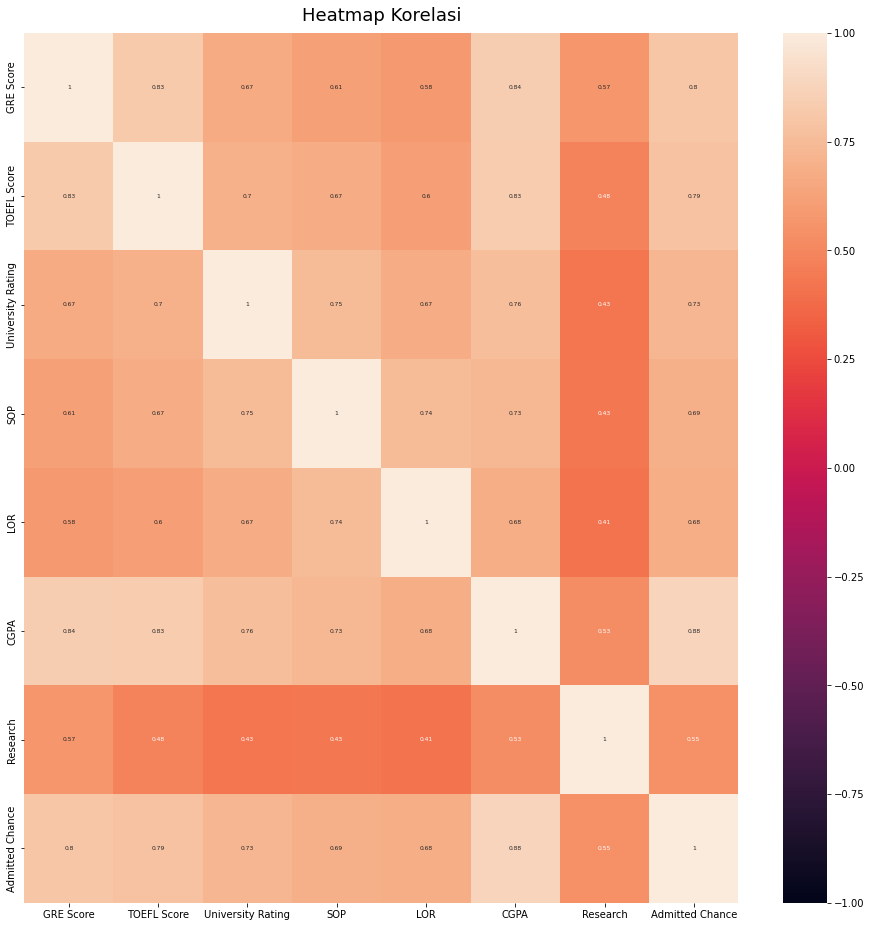

In [116]:
plt.figure(figsize= (16,16))

heatmap = sns.heatmap(corr_matrix, vmin= -1, vmax= 1, annot= True, annot_kws={'fontsize':6})
heatmap.set_title('Heatmap Korelasi', fontdict= {'fontsize': 18}, pad= 12)
plt.show()

All of the features have a strong positive correlation towards the dependent variable ('Admitted Chance').

Check the variance score / the multicolinearity of the features in the scaled X Train set.

In [117]:
# Scale the X train to see the VIF values
scaler_vif = StandardScaler()
Xtrain_scaled = scaler_vif.fit_transform(X_train)
Xtrain_scaled

array([[ 0.9164153 ,  0.62803543,  0.8387457 , ...,  1.19723259,
         0.70473286,  0.94387981],
       [ 0.30770149,  0.13488009, -0.04533761, ...,  0.63804611,
        -0.23390813,  0.94387981],
       [-0.30101232, -0.85143059, -0.04533761, ..., -0.48032685,
        -0.51885272, -1.05945693],
       ...,
       [-0.56188967, -0.85143059, -0.04533761, ...,  0.63804611,
        -0.93788888,  0.94387981],
       [-0.04013498, -0.19389013, -0.92942091, ...,  0.63804611,
        -0.43504549, -1.05945693],
       [-0.64884879, -0.35827525,  1.722829  , ...,  0.07885963,
        -0.03277078, -1.05945693]])

In [118]:
vif = [variance_inflation_factor(Xtrain_scaled, i) for i in range(Xtrain_scaled.shape[1])]
vif

[4.496234999925989,
 4.210365419053115,
 3.0462562303730714,
 3.2464429226063785,
 2.5320402525963623,
 5.55297661900784,
 1.5128100846142327]

In [119]:
X_train_vif = pd.DataFrame(vif, X_train.columns)
X_train_vif

,0
GRE Score,4.496235
TOEFL Score,4.210365
University Rating,3.046256
SOP,3.246443
LOR,2.532040
CGPA,5.552977
Research,1.512810


The VIF value that goes beyond 5 will be considered as having multicolinearity. Referred to the result, the column 'CGPA' has the variance value beyond 5. So the column will be dropped.

In [120]:
X_train_clean = X_train.drop(['CGPA'], axis= 1)
X_train_clean

,GRE Score,TOEFL Score,University Rating,SOP,LOR,Research
11,327,111,4,4.0,4.5,1
389,320,108,3,3.5,4.0,1
167,313,102,3,2.0,3.0,0
133,323,112,5,4.0,4.5,0
73,314,108,4,4.5,4.0,1
...,...,...,...,...,...,...
370,310,103,2,2.5,2.5,0
395,324,110,3,3.5,3.5,1
207,310,102,3,3.5,4.0,1
184,316,106,2,2.5,4.0,0


In [121]:
y_train

,Admitted Chance
11,0.84
389,0.76
167,0.64
133,0.79
73,0.84
...,...
370,0.72
395,0.82
207,0.66
184,0.72


In [122]:
# Drop CGPA column in the X test
X_test_clean = X_test.drop(['CGPA'], axis= 1)

### SCALING

Feature scalling for the Train set uses Standard scaller, as the distributions tend to be normal. Several models will be created to predict the student / applicant's chance to get admitted in US graduate school. Pipelines for each models are created for scaling and training the models with the data.

The regression models that will be trained are: Linear Regression, Polynomial Regression, Lasso Regression, Ridge Regression, and XGBoost.

In [123]:
scaler_lr = StandardScaler()
scaler_poly = StandardScaler()
scaler_poly_lr = StandardScaler()
scaler_ridge = StandardScaler()
scaler_lasso = StandardScaler()
scaler_xgb = StandardScaler()

In [124]:
reg_lr = LinearRegression()
reg_poly = PolynomialFeatures(degree= 2)
reg_poly_lr = LinearRegression()

For Ridge, Lasso, and XGBoost models, the best parameters will be searched beforehand.

## MODEL DEFINITION

Models and the hyperparameters that will be searched:
- Linear Regression -> - (default)
- Polynomial Regression -> degree
- Lasso Regression -> alpha
- Ridge Regression -> alpha
- XGBoost -> max_depth, n_estimators, learning_rate

In [125]:
pipe_lr = Pipeline([('scaler', scaler_lr), ('lr', reg_lr)])
pipe_poly = Pipeline([('scaler', scaler_poly), ('poly', reg_poly)])
pipe_poly_lr = Pipeline([('scaler', scaler_poly_lr), ('poly_lr', reg_poly_lr)])

## MODEL TRAINING

Convert X train and y train into array.

In [126]:
Xtrain = X_train_clean.values
Xtrain[:5]

array([[327. , 111. ,   4. ,   4. ,   4.5,   1. ],
       [320. , 108. ,   3. ,   3.5,   4. ,   1. ],
       [313. , 102. ,   3. ,   2. ,   3. ,   0. ],
       [323. , 112. ,   5. ,   4. ,   4.5,   0. ],
       [314. , 108. ,   4. ,   4.5,   4. ,   1. ]])

In [127]:
ytrain = y_train.values
ytrain[:5]

array([[0.84],
       [0.76],
       [0.64],
       [0.79],
       [0.84]])

In [128]:
# Create X train poly for Polynomial Regression
Xtrain_poly = pipe_poly.fit_transform(Xtrain)

In [129]:
# Create X test poly for Polynomial Regression
Xtest_poly = pipe_poly.transform(X_test_clean)

Scaling & Training model:

**Linear Regression**

In [130]:
LR = pipe_lr.fit(Xtrain, ytrain)

**Polynomial Regression**

In [131]:
POLY_LR = reg_poly_lr.fit(Xtrain_poly, ytrain)

**Ridge Regression**

In [132]:
# Finding the best parameter for alpha in Ridge model
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train_clean, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [133]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()
            for alpha in alphas]

Text(0, 0.5, 'rmse')

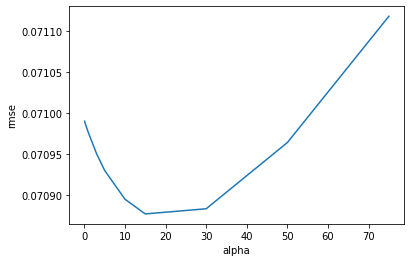

In [134]:
cv_ridge_ = pd.Series(cv_ridge, index = alphas)
cv_ridge_.plot()
plt.xlabel('alpha')
plt.ylabel('rmse')

Alpha with the rmse value closest to 0 is 15.

In [135]:
# Pipeline Ridge model
reg_ridge = Ridge(alpha= 15)
pipe_ridge = Pipeline([('scaler', scaler_ridge), ('ridge', reg_ridge)])

In [136]:
# Model
RIDGE = pipe_ridge.fit(Xtrain, ytrain)

**Lasso Regression**

In [137]:
# Findig the best parameter for alpha in Lasso model
reg_lasso_cv = LassoCV(eps=0.0001,n_alphas=300,cv=5).fit(Xtrain, ytrain)

In [138]:
best_alpha = reg_lasso_cv.alpha_

In [139]:
# Pipeline Lasso model
reg_lasso = Lasso(alpha= best_alpha)
pipe_lasso = Pipeline([('scaler', scaler_lasso), ('lasso_cv', reg_lasso)])

In [140]:
# Model
LASSO = pipe_lasso.fit(Xtrain, ytrain)

**XGBoost**

In [141]:
reg_xgb = xgb.XGBRegressor(eval_metric= 'rmsle')

In [142]:
# Finding the best parameter for XGBoost model
param_grid = {"max_depth":    [2, 4],
              "n_estimators": [int(x) for x in np.linspace(100, 1000, 10)],
              "learning_rate": [0.01, 0.015, 0.1]}

In [143]:
grid_search_xgb = GridSearchCV(reg_xgb, param_grid, cv=5)

In [144]:
pipe_xgb = Pipeline([('scaler', scaler_xgb), ('xgb', grid_search_xgb)])

In [145]:
# Model
XGB_best = pipe_xgb.fit(Xtrain, ytrain)

## MODEL EVALUATION

Convert the X test and y test into array:

In [146]:
Xtest = X_test_clean.values
Xtest[:5]

array([[325. , 110. ,   2. ,   3. ,   2.5,   1. ],
       [327. , 113. ,   3. ,   3.5,   3. ,   1. ],
       [310. , 107. ,   3. ,   3.5,   3.5,   0. ],
       [323. , 108. ,   5. ,   4. ,   4. ,   1. ],
       [336. , 112. ,   5. ,   5. ,   5. ,   1. ]])

In [147]:
ytest = y_test.values
ytest[:5]

array([[0.75],
       [0.8 ],
       [0.76],
       [0.81],
       [0.96]])

### Linear Regression

In [148]:
yhat_lr = LR.predict(Xtest)

In [149]:
yhat_lr_train = LR.predict(Xtrain)

In [150]:
print('Mean absolute error: %.2f' % np.mean(np.absolute(yhat_lr - ytest)))
print('Residual sum of squares (MSE): %.2f' % np.mean((yhat_lr - ytest) ** 2))
print('R2-score: %.2f' % r2_score(ytest, yhat_lr))
print('Akurasi:', round(r2_score(ytest, yhat_lr)*100), '%')

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.01
R2-score: 0.77
Akurasi: 77 %


### Polynomial Regression

In [151]:
yhat_poly = POLY_LR.predict(Xtest_poly)

In [152]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat_poly - ytest)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat_poly - ytest) ** 2))
print("R2-score: %.2f" % r2_score(ytest, yhat_poly) )
print('Akurasi:', round(r2_score(ytest, yhat_poly)*100), '%')

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.01
R2-score: 0.77
Akurasi: 77 %


### Ridge

In [153]:
yhat_ridge = RIDGE.predict(Xtest)

In [154]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat_ridge - ytest)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat_ridge - ytest) ** 2))
print("R2-score: %.2f" % r2_score(ytest, yhat_ridge) )
print('Akurasi:', round(r2_score(ytest, yhat_ridge)*100), '%')

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.01
R2-score: 0.77
Akurasi: 77 %


### Lasso

In [155]:
yhat_lasso = LASSO.predict(Xtest)

In [156]:
print('Mean absolute error: %.2f' % np.mean(np.absolute(yhat_lasso - ytest)))
print('Residual sum of squares (MSE): %.2f' % np.mean((yhat_lasso - ytest) ** 2))
print('R2-score: %.2f' % r2_score(ytest, yhat_lasso))
print('Akurasi:', round(r2_score(ytest, yhat_lasso)*100), '%')

Mean absolute error: 0.15
Residual sum of squares (MSE): 0.04
R2-score: 0.77
Akurasi: 77 %


Create the Lasso model without pipeline, to see the feature importance.

In [157]:
Lasso_nopipe = reg_lasso.fit(Xtrain, ytrain)

In [158]:
coef = pd.Series(Lasso_nopipe.coef_, index= X_train_clean.columns)

In [159]:
important = pd.concat([coef.sort_values().head(6)])

Text(0.5, 1.0, 'Koefisien pada Lasso model')

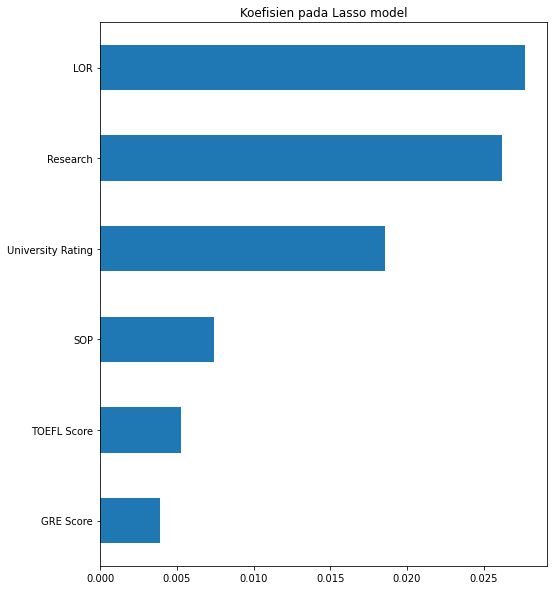

In [160]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
important.plot(kind = "barh")
plt.title("Koefisien pada Lasso model")

### XGBoost

In [161]:
yhat_xgb = XGB_best.predict(Xtest)

In [162]:
print('Mean absolute error: %.2f' % np.mean(np.absolute(yhat_xgb - ytest)))
print('Residual sum of squares (MSE): %.2f' % np.mean((yhat_xgb - ytest) ** 2))
print('R2-score: %.2f' % r2_score(ytest, yhat_xgb))
print('Akurasi:', round(r2_score(ytest, yhat_xgb)*100), '%')

Mean absolute error: 0.15
Residual sum of squares (MSE): 0.04
R2-score: 0.75
Akurasi: 75 %


From the overall performance, models with the best accuracy (R square) are Linear Regression, Polynomial, Lasso, and Ridge with 77% accuracy. But the MSE and MAE scores of Ridge, Polynomial, and Linear Regresion are the lowest.

## MODEL INFERENCE

In [164]:
df_inf

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


Create dataframe without the column 'CGPA' and 'Admitted Chance'.

In [165]:
df_inference = df_inf.drop(['CGPA', 'Admitted Chance'], axis= 1)
df_inference

,GRE Score,TOEFL Score,University Rating,SOP,LOR,Research
0,337,118,4,4.5,4.5,1
1,324,107,4,4.0,4.5,1
2,316,104,3,3.0,3.5,1
3,322,110,3,3.5,2.5,1
4,314,103,2,2.0,3.0,0
5,330,115,5,4.5,3.0,1
6,321,109,3,3.0,4.0,1
7,308,101,2,3.0,4.0,0
8,302,102,1,2.0,1.5,0
9,323,108,3,3.5,3.0,0


In [166]:
inf = df_inference.values

The prediction of student / applicant's chance to get admitted in a graduate school in the US:

In [167]:
# Ridge Regression
yhat_ridge_inf = RIDGE.predict(inf)
yhat_ridge_inf

array([[0.92352015],
       [0.81413935],
       [0.71480391],
       [0.74601603],
       [0.63299967],
       [0.86111953],
       [0.77238806],
       [0.63660691],
       [0.52552782],
       [0.72447134]])

In [168]:
# Polynomial Regression
inf_poly = pipe_poly.transform(df_inference)

yhat_poly_inf = POLY_LR.predict(inf_poly)
yhat_poly_inf

array([[0.93070984],
       [0.83068657],
       [0.71932411],
       [0.75827026],
       [0.62808609],
       [0.9113102 ],
       [0.77033997],
       [0.66341591],
       [0.54242706],
       [0.73222542]])

In [169]:
# Linear Regression
yhat_lr_inf = LR.predict(inf)
yhat_lr_inf

array([[0.92730391],
       [0.81550306],
       [0.71478982],
       [0.74538968],
       [0.63490862],
       [0.8612755 ],
       [0.77430009],
       [0.63643794],
       [0.52266521],
       [0.72586461]])

## CONCLUSION

- Student / applicants who aim to pursue their graduate degree in the US have average GRE and TOEFL scores, average undergraduate university rating, good Statement of Purpose and Letter of Recommendation strength, and tend to have done a research.
- The most influential factors in determining applicant's admitted chance based on Lasso feature importance (sorted from the most influential) is: Letter of Recommendation strength, research experience, undergraduate university rating, TOEFL score, Statement of Purpose strength, and GRE score.
- Regression models with the best accuracy to predict the admitted chance in graduate schools in the US are: Ridge Regression, Polynomial Regression, and Linear Regression.
- Models' accuracy can be increased, by doing further preprocessing steps.
- In the real practice, the applicants' acceptance chance are also ifluenced by other factors not included in the datset, such as the graduate program's acceptance rate.